# Trabalho de Algoritmos e Estrutura de Dados
## Problema da Mochila Binária

Universidade de Brasília - PPCA
Algoritmos e Estruturas da Dados

Adriano Nunes Soares - 22/0005249
Marcos Castro - 22/0005575
Paulo Célio Soares da Silva Júnior - 22/0005605

Prof. Dr. Edison Ishikawa

## Importando as dependências

In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
from knapsack_utils import KnapsackSolverFactory

## 1 - Contextualizando o problema
***

O Conselho Nacional do Ministério Público (CNMP) possui como missão estratégica o fortalecimento, a fiscalização e o aprimoramento do Ministério Público brasileiro, atuando na qualidade de orgão de controle externo.

De maneira bem resumida, a forma que o CNMP estabeleceu para realizar seu planejamento orçamentário consiste em levantar os itens orçamentários necessários e categorizar o somatório dos valores estimados e propostos pelas unidades administrativas entre os que estão dentro do orçamento e, o que exceder, como extra-limite. Para auxiliar no processo, cada item que compõe o orçamento é priorizado usando-se uma matriz GUT (Gravidade x Urgência x Tendência).

Essa forma de divisão serve para que, caso haja sobras, valores possam ser remanejados de outros setores e possam cobrir valores declarados em extra-limite. Contudo ela pode levar a uma composição orçamentário inadequada, já que não existem diretrizes claras para inclusão ou não das ações previstas.

Além disso, em algumas situações, a avaliação feita por um especialista do respectivo setor acaba por separar, para uma mesma ação, valores dentro do limite e extra-limite, o que, na prática, não resolve o problema, dado que, para licitações, o fluxo padrão só autoriza a abertura do certame no caso da existência do valor integral dos recursos orçamentários.

O caso em análise trata da proposta orçamentária da Secretaria de Tecnologia da Informação (STI) do CNMP para o ano de 2023. A Secretaria teve autorizado para o respectivo planejamento o valor disponível de **R$\$$6.200.000,00**. Contudo, após a realização dos estudos, chegou-se a um montante superior ao limite concedido, chegando-se no valor de **R$\$$7.646.155,28**, onde a diferença compõe o valor categorizado como extra-limite.

Assim sendo, o objetivo desse estudo de caso, com base no descrito, é obter uma melhor divisão dos recursos orçamentários, dentro do limite estipulado, de forma sistemática, diminuindo-se a subjetividade da avaliação do especialista e potencializando a importância dos ações orçamentárias que deverão compor o orçamento da STI. Além disso, a solução, utilizando-se, para isso, algoritmos computacionais, poderá aplicada tanto para o ano de 2023, como para qualquer outro exercício em que o mesmo problema se apresente.

Pelas características apresentadas, o problema caracteriza-se muito fortemente ao Problema da Mochila.


### 1.1 - Problema da Mochila

O Problema da Mochila (em inglês, _Knapsack Problem_) é um problema de otimização combinatória. O nome dá-se devido ao modelo de uma situação em que é necessário preencher uma mochila com objetos de diferentes pesos e valores. O objetivo é que se preencha a mochila com o maior valor possível, não ultrapassando o peso máximo. O problema da mochila é um dos 21 problemas NP-completos de Richard Karp, exposto em 1972. A formulação do problema é extremamente simples, porém sua solução é mais complexa.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/486px-Knapsack.svg.png?20070709074029" alt="Problema da Mochila: Como maximizar o valor com um peso máximo?" width="600" height="500"/>

Para o estudo de caso, será considerada a variação do Problema da Mochila chamada Problema da Mochila Binária (_0-1 Knapsack Problem_). Nesta variação os itens são completamente escolhidos, ou não são escolhidos caso não caibam na mochila. Por exemplo, supondo que haja dois itens com pesos de 2kg and 3kg respectivamente, se a mochila suporta o peso de 1kg, os itens não poderão ser selecionados, dado que não podem ser divididos. Já em um hipótese que a mochila pese 3kg, apenas um dos itens podem ser selecionados, não sendo permitido o fracionamento de qualquer um deles. Da mesma forma se comporta o orçamento caracterizado no problema.

Assim sendo, os pesos dos itens correspondem ao valor orçamentário de cada um deles, não sendo permitido o fracionamento, e os valores correspondem ao valor GUT individual, aqui denominado importância. A capacidade da mochila corresponde ao valor total do orçamento disponível para distribuição para o planejamento orçamentário, no caso, R$\$$6.200.000,00.

### 1.2 - Configurando os parâmetros

Com o valor disponível (capacidade) definido, resta a configuração dos itens orçamentários (correspondente aos itens da mochila). Eles serão carregados, a partir de uma planilha Excel que contem os dados que servirão de base para montar o dataset, para um dataframe da biblioteca [Pandas](https://pandas.pydata.org/) escrita em Python. O dataset será estruturado da seguinte forma:

- Ação (acao): descrição do item orçamentário;
- GUT (importancia): GUT atribuído e que caracteriza sua importância na priorização; ele representa o valor do item carregado na mochila;
- Valor (valor): valor monetário de cada item orçamentário; ele representa o peso do item a ser carregado na mochila;
- Importância / Valor (importancia_por_valor): GUT atribuído a cada unidade de monitária; serve para o funcionamento de alguns dos algoritmos; e
- Proporção (proporcao): indica a proporção (importância ou valor) a ser considerado do item orçamentário; para o estudo de caso, pode ser 0 (não escolhido) ou 1 (escolhido).

In [2]:
valor_disponivel = float(6200000)
itens = pd.read_excel("proposicoes_STI_2023.xlsx", sheet_name="Tratado")
itens = itens.filter(["Ação", "GUT", "Unidade Total"])
itens = itens.rename(columns={"Ação": "acao", "GUT": "importancia",
                              "Unidade Total": "valor"})
itens["importancia_por_valor"] = itens.importancia / itens.valor
itens["proporcao"] = 0


Exibindo o conteúdo dos 5 primeiros registros.

In [3]:
itens.head()

,acao,importancia,valor,importancia_por_valor,proporcao
0,Acesso à base de dados da receita federal,8,7164.35,0.001117,0
1,Big Data Nuvem,18,480000.00,0.000037,0
2,Big Data Nuvem,18,480000.00,0.000037,0
3,Canal de Comunicação com a internet - 1,125,62376.33,0.002004,0
4,Canal de Comunicação com a internet - 2,125,66140.32,0.001890,0


### 1.3 - Configurando o dataset de estatísticas

Aqui é inicializado o DataFrame do Pandas que conterá as estatísticas. O dataset tem o seguinte estrutura:

- algoritmo: Nome do algoritmo utilizado;
- inicio_processamento: _timestamp_ de quando o processamento foi iniciado;
- fim_processamento: _timestamp_ de quando o processamento foi encerrado;
- tempo_processamento: duração do processamento(fim_processamento - inicio_processamento);
- importancia_maxima: importância máxima obtida pelo somatório das importâncias de todos os itens selecionados pelo algoritmo;
- valor_maximo: valor máximo obtido pelo somatório dos valores de todos os itens selecionados pelo algoritmo;
- itens_selecionados: itens selecionados pelo algoritmo;
- itens_rejeitados: itens não selecionados pelo algoritmo.

In [4]:
estatisticas = pd.DataFrame(columns=["algoritmo", "inicio_processamento",
                                     "fim_processamento", "tempo_processamento",
                                     "importancia_maxima", "valor_maximo",
                                     "itens_selecionados", "itens_rejeitados"])

### 1.4 - Configurando funções auxiliares

Para facilitar a execução do código, a primeira função auxiliar criada encapsula a execução dos _solvers_ que resolverão os problemas da mochila.

In [5]:
def solucionar_problema(knapsack_solver, **kwargs) -> tuple[pd.DataFrame,
                                                            pd.DataFrame]:
    """
    Função auxiliar para encapsular a lógica de execução e impressão dos
    resultados do *solver knapsack*. Também retorna a estatística da execução.

    :param knapsack_solver: Solver knapsack configurado com o problema a ser
        solucionado.
    :param **kwargs: Veja a documentação do solver utilizado para saber os
        parâmetros a serem passados.
    :return:
        itens_retornados: Itens orçamentários processados na execução do solver.
        estatistica: Estatística da execução.
    """
    # Execução do solver.
    inicio_processamento = datetime.now()
    print("Início do processamento:", inicio_processamento)
    itens_retornados = knapsack_solver.solucionar(**kwargs)
    fim_processamento = datetime.now()
    tempo_processamento = fim_processamento - inicio_processamento
    print("Fim do processamento:", fim_processamento)
    print("Tempo de processamento:", tempo_processamento, end="\n\n")

    # Impressão da solução do problema
    print("Algoritmo utilizado:", knapsack_solver)
    importancia_maxima = itens_retornados.query('proporcao == 1').importancia.sum()
    valor_maximo = itens_retornados.query('proporcao == 1').valor.sum()
    print(f"Importância máxima obtida: {importancia_maxima}")
    print(f"Valor máximo obtido: R${valor_maximo:0.2f}")

    # Configuração da estatística de execução do solver.
    dicionario_estatistica = {"algoritmo": [str(knapsack_solver)],
                              "inicio_processamento": [inicio_processamento],
                              "fim_processamento": [fim_processamento],
                              "tempo_processamento": [tempo_processamento.
                                                      total_seconds()],
                              "importancia_maxima": [importancia_maxima],
                              "valor_maximo": [valor_maximo],
                              "itens_selecionados": [len(itens_retornados.
                                                         query("proporcao == 1"))],
                              "itens_rejeitados": [len(itens_retornados.
                                                       query("proporcao == 0"))]}
    estatistica = pd.DataFrame(dicionario_estatistica)

    return itens_retornados, estatistica

A segunda função é utilizada no gráfico de barras que compara os valores obtidos na execução dos algoritmos para formatar o valor monetário do eixo Y.

In [6]:
def formatar_numero(valor, index):
    if valor >= 1000000:
        formatter = f"{valor / 1000000:1.1f}M"
    else:
        formatter = f"{valor / 100000:1.0f}K"

    return formatter

## 2 - Algoritmos Exatos
***

Esta seção é dedicada à observação da resolução do problema de distribuição do orçamento utilizado algoritmos exatos (Programação Dinâmica e Branch and Bound). Esses algoritmos conseguem chegar na solução ótima.

### 2.1 - Programação Dinâmica

Programação Dinâmica é um método aplicável a problemas nos quais a solução ótima pode ser computada a partir da solução ótima previamente calculada e memorizada, de forma a evitar recálculo, de outros subproblemas que, sobrepostos, compõem o problema original. Ou seja, busca encontrar a solução desses vários subproblemas para, então, encontrar a solução do problema geral. A grande diferença dessa metodologia é que os subresultados são armazenados em memória já que eles são utilizados em diversos momentos dentro do cômputo da solução.

Solucionando o problema com o algoritmo de Programação Dinâmica.

In [7]:
knapsack_solver = KnapsackSolverFactory.\
    get_solver(KnapsackSolverFactory.DYNAMIC_PROGRAMMING_KNAPSACK_SOLVER,
               valor_disponivel, itens)
itens_retornados, estatistica = solucionar_problema(knapsack_solver)

estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

Início do processamento: 2022-09-21 12:04:05.726451
Fim do processamento: 2022-09-21 12:09:58.662950
Tempo de processamento: 0:05:52.936499

Algoritmo utilizado: Programação Dinâmica
Importância máxima obtida: 2208
Valor máximo obtido: R$6153187.28


Itens selecionados.


In [8]:
itens_retornados.query("proporcao == 1")

,acao,importancia,valor,importancia_por_valor,proporcao
0,Acesso à base de dados da receita federal,8,7164.35,0.001117,1
3,Canal de Comunicação com a internet - 1,125,62376.33,0.002004,1
4,Canal de Comunicação com a internet - 2,125,66140.32,0.001890,1
5,Certificados Digitais,45,6784.00,0.006633,1
6,Extensão de garantia da rede sem fio,16,176000.00,0.000091,1
7,Extensão de garantia e assistência técnica da ...,16,56000.00,0.000286,1
8,Fábrica de desenvolvimento de software,75,671086.17,0.000112,1
9,Garantia e suporte para a solução de balanceam...,80,127120.50,0.000629,1
10,LGPD - Contratação de solução que permita a in...,18,300000.00,0.000060,1
11,LGPD - Ferramenta para mascaramento de informa...,27,75900.00,0.000356,1


Itens rejeitados.

In [9]:
itens_retornados.query("proporcao == 0")

,acao,importancia,valor,importancia_por_valor,proporcao
1,Big Data Nuvem,18,480000.0,0.000037,0
2,Big Data Nuvem,18,480000.0,0.000037,0
20,Serviço de consultoria estratégica em Tecnolog...,1,532968.0,0.000002,0


### 2.2 - Branch and Bound

O método Branch and bound, proposto por A. H. Land e A. G. Doig em 1960, é um algoritmo para encontrar soluções ótimas para vários problemas de otimização, especialmente em otimização combinatória. Consiste em uma enumeração sistemática de todos os candidatos a solução, através da qual grandes subconjuntos de candidatos infrutíferos são descartados em massa utilizando os limites superior e inferior da quantia otimizada.

Solucionando o problema com o algoritmo Branch and Bound.

In [10]:
knapsack_solver = KnapsackSolverFactory.\
    get_solver(KnapsackSolverFactory.BRANCH_AND_BOUND_KNAPSACK_SOLVER,
               valor_disponivel, itens)
itens_retornados, estatistica = solucionar_problema(knapsack_solver)

estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

Início do processamento: 2022-09-21 12:09:58.764465
Fim do processamento: 2022-09-21 12:09:58.825447
Tempo de processamento: 0:00:00.060982

Algoritmo utilizado: Branch and Bound
Importância máxima obtida: 2208
Valor máximo obtido: R$6153187.28


Itens selecionados.


In [11]:
itens_retornados.query("proporcao == 1")

,acao,importancia,valor,importancia_por_valor,proporcao
0,Acesso à base de dados da receita federal,8,7164.35,0.001117,1
3,Canal de Comunicação com a internet - 1,125,62376.33,0.002004,1
4,Canal de Comunicação com a internet - 2,125,66140.32,0.001890,1
5,Certificados Digitais,45,6784.00,0.006633,1
6,Extensão de garantia da rede sem fio,16,176000.00,0.000091,1
7,Extensão de garantia e assistência técnica da ...,16,56000.00,0.000286,1
8,Fábrica de desenvolvimento de software,75,671086.17,0.000112,1
9,Garantia e suporte para a solução de balanceam...,80,127120.50,0.000629,1
10,LGPD - Contratação de solução que permita a in...,18,300000.00,0.000060,1
11,LGPD - Ferramenta para mascaramento de informa...,27,75900.00,0.000356,1


Itens rejeitados.

In [12]:
itens_retornados.query("proporcao == 0")

,acao,importancia,valor,importancia_por_valor,proporcao
1,Big Data Nuvem,18,480000.0,0.000037,0
2,Big Data Nuvem,18,480000.0,0.000037,0
20,Serviço de consultoria estratégica em Tecnolog...,1,532968.0,0.000002,0


## 3 - Algoritmos Aproximados
***

Esta seção é dedicada à observação da resolução do problema de distribuição do orçamento utilizado algoritmos aproximados, utilizando heurística construtiva (Algoritmo Guloso) e metaheurística (Busca Tabu). Esses algoritmos são feitos para entregar soluções aproximadas, mas satisfatórias, considerando-se um custo computacional alto para obtenção da solução ótima.

### 3.1 - Algoritmo Guloso

Algoritmo guloso é técnica de projeto de algoritmos que tenta resolver o problema fazendo a escolha localmente ótima em cada fase com a esperança de encontrar um ótimo global.

Na solução de alguns problemas combinatórios a estratégia gulosa pode assegurar a obtenção de soluções ótimas, o que não é muito comum. No entanto, quando o problema a ser resolvido pertencer à classe NP-completo ou NP-difícil, a estratégia gulosa torna-se atrativa para a obtenção de solução aproximada em tempo polinomial.

Solucionando o problema com o algoritmo Guloso.

In [13]:
knapsack_solver = KnapsackSolverFactory.\
    get_solver(KnapsackSolverFactory.GREEDY_KNAPSACK_SOLVER,
               valor_disponivel, itens)
itens_retornados, estatistica = solucionar_problema(knapsack_solver)

estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

Início do processamento: 2022-09-21 12:09:58.922418
Fim do processamento: 2022-09-21 12:09:58.928416
Tempo de processamento: 0:00:00.005998

Algoritmo utilizado: Algoritmo Guloso
Importância máxima obtida: 2199
Valor máximo obtido: R$5713187.28


Itens selecionados.

In [14]:
itens_retornados.query("proporcao == 1")

,acao,importancia,valor,importancia_por_valor,proporcao
0,Acesso à base de dados da receita federal,8,7164.35,0.001117,1
1,Big Data Nuvem,18,480000.00,0.000037,1
2,Big Data Nuvem,18,480000.00,0.000037,1
3,Canal de Comunicação com a internet - 1,125,62376.33,0.002004,1
4,Canal de Comunicação com a internet - 2,125,66140.32,0.001890,1
5,Certificados Digitais,45,6784.00,0.006633,1
6,Extensão de garantia da rede sem fio,16,176000.00,0.000091,1
7,Extensão de garantia e assistência técnica da ...,16,56000.00,0.000286,1
8,Fábrica de desenvolvimento de software,75,671086.17,0.000112,1
9,Garantia e suporte para a solução de balanceam...,80,127120.50,0.000629,1


Itens rejeitados.

In [15]:
itens_retornados.query("proporcao == 0")

,acao,importancia,valor,importancia_por_valor,proporcao
16,Renovação Infraestrutura de Servidores de Rede,45,1400000.0,0.000032,0
20,Serviço de consultoria estratégica em Tecnolog...,1,532968.0,0.000002,0


### 3.2 - Busca Tabu
A Busca Tabu, algoritmo proposto por Glover na sua forma atual em 1986, é uma metaheurística, ou procedimento adaptativo auxiliar, que guia um algoritmo de busca local na exploração contínua dentro de um espaço de busca. Aqui a implementação tenta melhorar o resultado obtido a partir de uma heurística gulosa.

A partir de uma solução inicial, que pode ser escolhida de acordo com algum dentre vários critérios possíveis, tenta avançar, a cada iteração, para uma outra solução (melhor que a anterior) não aceitando movimentos que levem a soluções já visitadas, que permanecem em uma lista Tabu, durante certo número de iterações (o algoritmo programado tem como padrão 3, mas pode ser configurado com o parâmetro `prazo_tabu`).

O algoritmo programado tentará melhorar a solução inicial durante tempo computacional predeterminado (o valor padrão é 60 segundos, mas pode ser modificado utilizando-se o parâmetro `timeout`). Aqui, para tentar chegar o mais próximo possível da solução ótima, o algoritmo será configurado para rodar por 5 minutos (`timeout` = 300).

Solucionando o problema para o algoritmo de Busca Tabu.

In [16]:
knapsack_solver = KnapsackSolverFactory.\
    get_solver(KnapsackSolverFactory.TABU_SEARCH_KNAPSACK_SOLVER,
               valor_disponivel, itens)
itens_retornados, estatistica = solucionar_problema(knapsack_solver, timeout=300)

estatisticas = pd.concat([estatisticas, estatistica], ignore_index=True)

Início do processamento: 2022-09-21 12:09:59.027910
Fim do processamento: 2022-09-21 12:14:59.100718
Tempo de processamento: 0:05:00.072808

Algoritmo utilizado: Busca Tabu
Importância máxima obtida: 2199
Valor máximo obtido: R$5713187.28


Itens selecionados.

In [17]:
itens_retornados.query("proporcao == 1")

,acao,importancia,valor,importancia_por_valor,proporcao
0,Acesso à base de dados da receita federal,8,7164.35,0.001117,1
1,Big Data Nuvem,18,480000.00,0.000037,1
2,Big Data Nuvem,18,480000.00,0.000037,1
3,Canal de Comunicação com a internet - 1,125,62376.33,0.002004,1
4,Canal de Comunicação com a internet - 2,125,66140.32,0.001890,1
5,Certificados Digitais,45,6784.00,0.006633,1
6,Extensão de garantia da rede sem fio,16,176000.00,0.000091,1
7,Extensão de garantia e assistência técnica da ...,16,56000.00,0.000286,1
8,Fábrica de desenvolvimento de software,75,671086.17,0.000112,1
9,Garantia e suporte para a solução de balanceam...,80,127120.50,0.000629,1


Itens rejeitados.

In [18]:
itens_retornados.query("proporcao == 0")

,acao,importancia,valor,importancia_por_valor,proporcao
16,Renovação Infraestrutura de Servidores de Rede,45,1400000.0,0.000032,0
20,Serviço de consultoria estratégica em Tecnolog...,1,532968.0,0.000002,0


## 4 - Resultados
***

A execução começou pelos algoritmos exatos, indo, na sequência, para os algoritmos aproximados. Ambos os algoritmos exatos trouxeram a solução ótima, tendo o somatório das importâncias totalizando 2208 e o somatório dos valores totalizando R$\$$6.153.187,28. Quanto aos algoritmos aproximados, ambos retornaram importâncias e valores iguais, mas com uma solução subótima (importância = 2199 e valor = R$\$$5.713.187,28). Embora o aproveitamento orçamentário tenha sido melhor nos algoritmos exatos, o número de itens carregados foi inferior em 1 unidade em relação aos algoritmos aproximados, o que, por si só, não diz muita coisa já que a importância foi maximizada e a distribuição orçamentária otimizada.

Em termos de tempos de processamento, o algoritmo com pior desempenho, por sua natureza, foi o de Programação Dinâmica, demorando cerca de 6 minutos para finalizar sua execução. O com melhor desempenho foi o Algoritmo Guloso, demorando cerca de 0,005 segundos, seguido pelo algoritmo Branch and Bound com cerca de 0,06 segundos. A metaheurística de Busca Tabu teve o seu tempo controlado e executou em exatos 5 minutos. Contudo, mesmo com o tempo gasto procurando soluções melhores, o algoritmo não conseguiu melhorar a solução trazida pelo algoritmo guloso executado internamente na fase prévia (o algoritmo de Busca Tabu executa o algoritmo guloso internamente; não confundir com a execução feita aqui).

A seguir, são demonstradas as estatísticas e os gráficos de desempenho.

### 4.1 - Estatísticas coletadas

In [19]:
estatisticas

,algoritmo,inicio_processamento,fim_processamento,tempo_processamento,importancia_maxima,valor_maximo,itens_selecionados,itens_rejeitados
0,Programação Dinâmica,2022-09-21 12:04:05.726451,2022-09-21 12:09:58.662950,352.936499,2208,6153187.28,29,3
1,Branch and Bound,2022-09-21 12:09:58.764465,2022-09-21 12:09:58.825447,0.060982,2208,6153187.28,29,3
2,Algoritmo Guloso,2022-09-21 12:09:58.922418,2022-09-21 12:09:58.928416,0.005998,2199,5713187.28,30,2
3,Busca Tabu,2022-09-21 12:09:59.027910,2022-09-21 12:14:59.100718,300.072808,2199,5713187.28,30,2


### 4.2 - Gráficos

Importância máxima obtida.

<AxesSubplot:xlabel='Algoritmo', ylabel='Importância Máxima'>

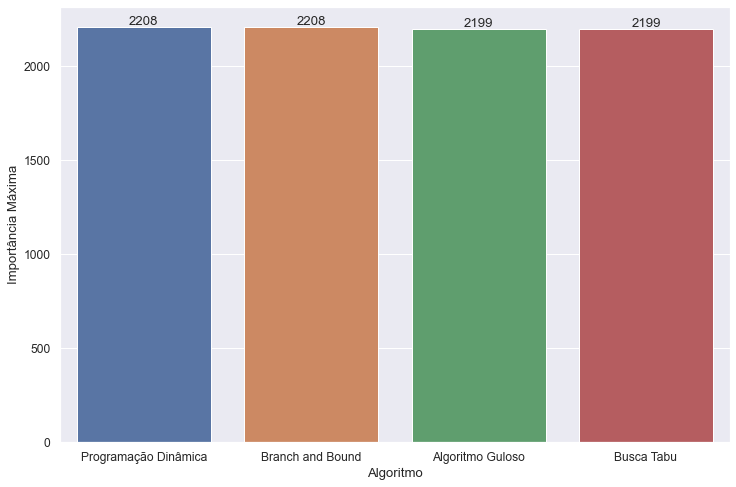

In [20]:
sns.set(font_scale=1.1)
ax = sns.barplot(x="algoritmo", y="importancia_maxima", data=estatisticas)
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(12, 8)
ax.set_xlabel("Algoritmo")
ax.set_ylabel("Importância Máxima")
ax

Valor máximo obtido.

<AxesSubplot:xlabel='Algoritmo', ylabel='Valor Máximo (R$)'>

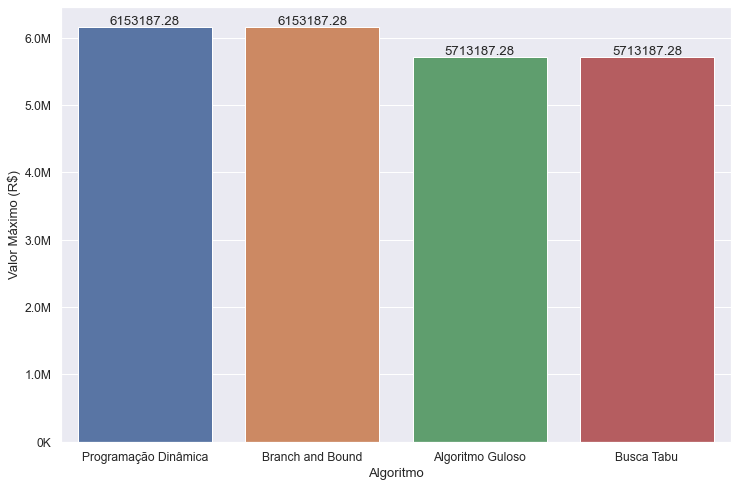

In [21]:
ax = sns.barplot(x="algoritmo", y="valor_maximo", data=estatisticas)
ax.bar_label(ax.containers[0], fmt='%1.2f')
ax.figure.set_size_inches(12, 8)
ax.yaxis.set_major_formatter(formatar_numero)
ax.set_xlabel("Algoritmo")
ax.set_ylabel("Valor Máximo (R$)")
ax

Composição da orçamento após a execução dos algoritmos.

<AxesSubplot:xlabel='Algoritmo', ylabel='Quantidade'>

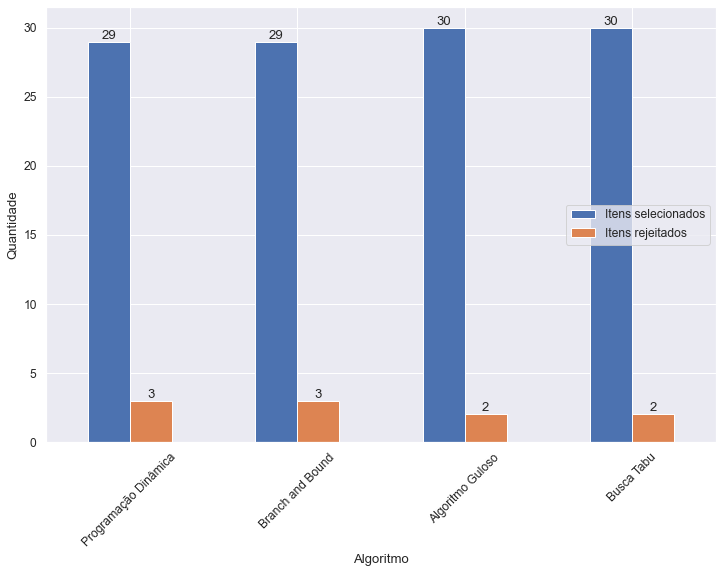

In [22]:
estatisticas_composicao = estatisticas.filter(["algoritmo", "itens_selecionados",
                                               "itens_rejeitados"])
estatisticas_composicao.set_index("algoritmo", inplace=True)
ax = estatisticas_composicao.plot(kind="bar")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.figure.set_size_inches(12, 8)
ax.legend(loc="center right", labels=["Itens selecionados", "Itens rejeitados"])
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel("Algoritmo")
ax.set_ylabel("Quantidade")
ax

Tempo de processamento.

<AxesSubplot:xlabel='Tempo de Processamento (segundos)', ylabel='Algoritmo'>

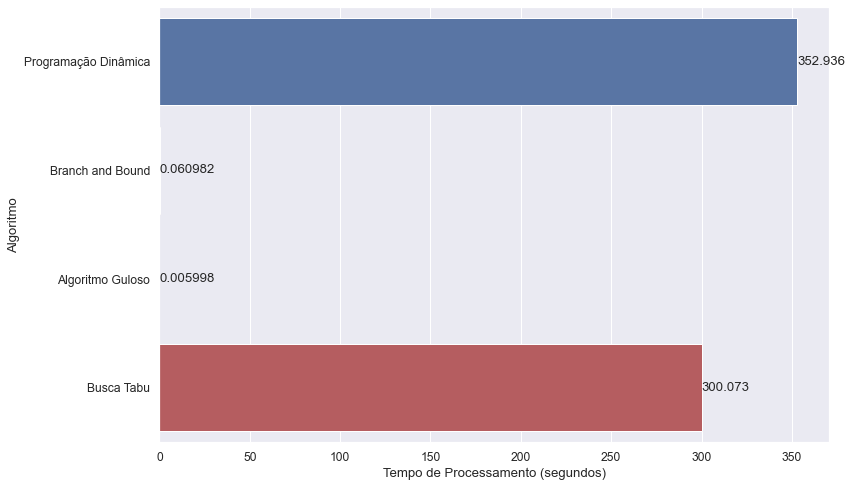

In [23]:
ax = sns.barplot(x="tempo_processamento", y="algoritmo", data=estatisticas,
                 orient="h")
ax.bar_label(ax.containers[0])
ax.figure.set_size_inches(12, 8)
ax.set_xlabel("Tempo de Processamento (segundos)")
ax.set_ylabel("Algoritmo")
ax

## 5 - Conclusão
***

Pelos resultados observados, no contexto apresentado, foi possível obter, computacionalmente, uma solução satisfatória para a distribuição orçamentária. Todos os quatro algoritmos estudados são viáveis e melhoram a distribuição orçamentária proposta pelo setor, correspondendo a 2,9% de melhoria para os algoritmos exatos e 2,5% para os algoritmos aproximados. Contudo, mínimas mudanças nos parâmetros do problema, como, por exemplo, aumento da valor disponível para distribuição ou do número de itens a serem avaliados, poderiam afetar o desempenho, em especial caso a solução contasse com o uso de algoritmos exatos, situação na qual seria recomendável o uso de algoritmos aproximados.

No entanto, tal situação só se configuraria em hipóteses de análise da distribuição orçamentária de todo o orçamento do órgão ou de vários setores simultaneamente, o que levaria até a um questionamento se a solução adotada ainda passaria pela resolução do Problema da Mochila Binária ou se se poderia aplicar outra variante, como, por exemplo, o Problema da Mochila Multidimensional.

Feitas essas considerações, para o contexto apresentado, por apresentar uma solução ótima, o algoritmo de Branch and Bound levou clara vantagem, pelo tempo curto de processamento e por trazer solução ótima, não sendo necessária a aplicação de heurísticas ou metaheurísticas como opções prioritárias. Como estudo futuro, pretende-se ampliar a abordagem utilizada aqui, a fim de avaliar a adequação da solução do Problema da Mochila Multidimensional para um contexto mais amplo, envolvendo mais setores e o orçamento global do CNMP.